### NAME: NEHA ADAWADKAR

### DATA SCIENCE AND BUSINESS ANALYTICS 

### TASK1: Prediction using Supervised Machine learning
### Predict the percentage of an student based on the no. of study hours using linear regression

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data from the dataset 

In [2]:
df=pd.read_csv("student_score.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Displaying the no. of entries from the dataset

In [6]:
df.shape

(25, 2)

Plotting the graph with respect to hours and percentage scored

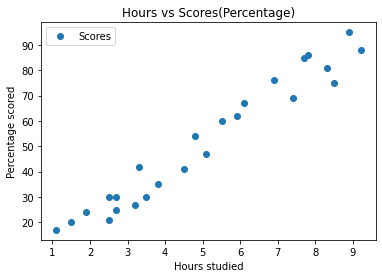

In [7]:
df.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Scores(Percentage)")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

From this graph we can see that there is a positive corelation betweeen the hours studied and the percentage obtained, hence it is a linear regression

### PREPARING THE DATA

Selecting the values for x and y labels

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Splitting the data into testing and training datasets

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### TRAINING THE MODEL

The values taken from training dataset are trained using linear regression model algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### PlOTTING THE REGRESSION LINE

Printing the coefficient and intercept values required to plot the regression line 

In [11]:
reg.coef_

array([9.91065648])

In [12]:
reg.intercept_

2.018160041434683

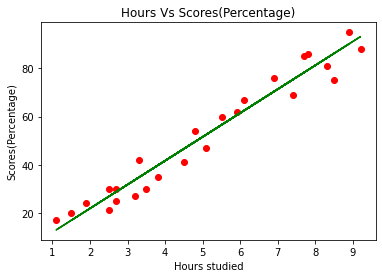

In [13]:
line=reg.coef_*X+reg.intercept_

plt.scatter(X, y, color='red')
plt.title("Hours Vs Scores(Percentage)")
plt.xlabel("Hours studied")
plt.ylabel("Scores(Percentage)")
plt.plot(X,line,color='green');
plt.show()

### PREDICTING THE SCORES

Using the test dataset we can predict the scores of students by predict method

In [14]:
# Testing data - In Hours
print(X_test) 

 # Predicting the scores
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing the actual data and the predicted data

In [19]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting the the score of the student if he studied for a given amount of time can be directly calculated by predict function

In [17]:
# predict values by own data 
hours = [9.25]
own_pred = reg.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


### EVALUATING THE MODEL

They are used for comparing how well different algorithms perform on a particular dataset.Here, I have evaluated the model by using mean absolute error, mean squared error and root mean sqaured error. 

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
